<a href="https://colab.research.google.com/github/Mooussa/DevOps-training/blob/master/object_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with **Mediapipe** Task

Detecting objects in an image using mediapipe task

## Dependencies

In [1]:
!pip install mediapipe==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 15.0 MB/s eta 0:00:00


In [2]:
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

## Visualization utilities

In [32]:
#@markdown We implemented some functions to visualize the object detection results. <br/> Run the following cell to activate the functions.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
RECT_COLOR = (0, 255, 0)  # RGB format
TEXT_COLOR = (0, 0, 255)


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, RECT_COLOR, 2)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' [' + str(probability) + ']'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

# Download test image

In [16]:
# Test image from Pixabay
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/object_detector/cat_and_dog.jpg


In [17]:
!ls


efficientdet.tflite  image.jpg	sample_data


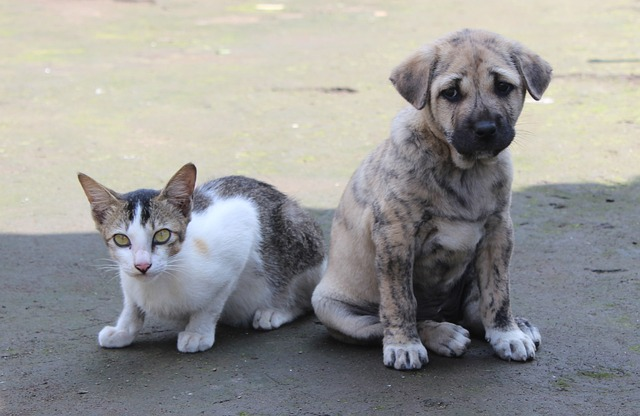

In [18]:
IMAGE_FILE = 'image.jpg'

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(IMAGE_FILE)
cv2_imshow(img)

## Running inference and visualizing the results

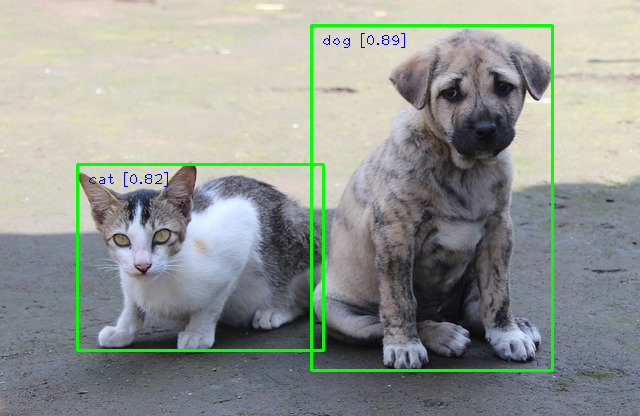

In [33]:
# Step 1: import the necessarymodules
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Step 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options, score_threshold=0.5)

detector = vision.ObjectDetector.create_from_options(options)

# Step 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# Step 4: Detect objects in the input image.
detection_result = detector.detect(image)

# Step 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

cv2_imshow(rgb_annotated_image)